# Multiple Linear Regression

In [17]:
#27-03-2023                                          21b01a1288

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [19]:
df=pd.read_csv('./AdvertisingSales.csv')

In [20]:
# head the data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

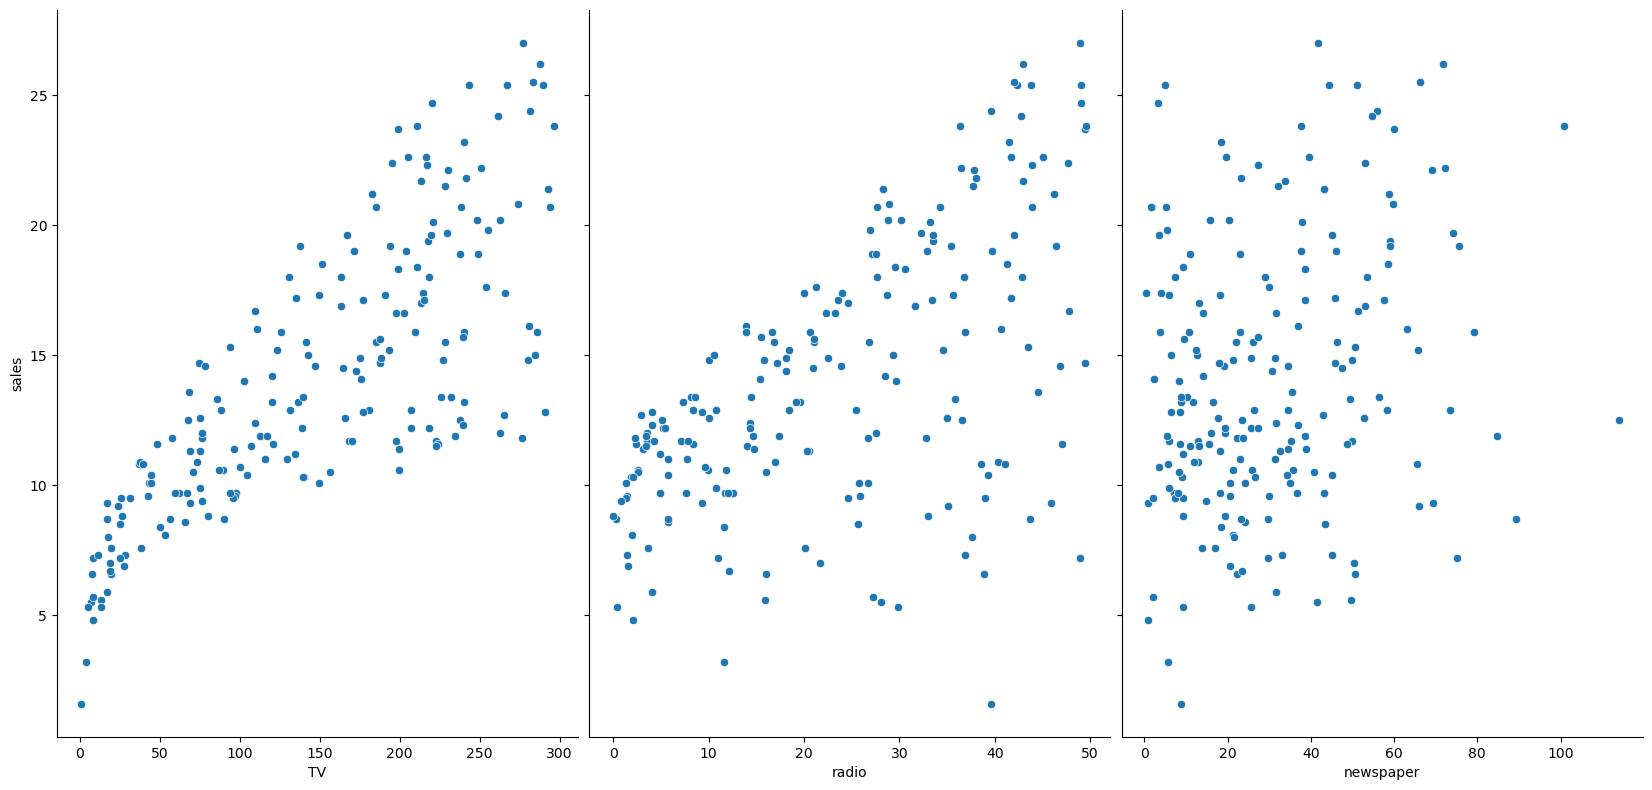

In [31]:
# Generate pairplot between 'TV','radio','newspaper' as X and sales as Y 
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',height=8,aspect=0.7)
plt.show()

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [38]:
x=df.iloc[:,[0,3]].values
y=df['sales'].values

In [39]:
#Create model by defining X as input features and Y as output feature
# print coefficient and intercepts
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
lm=LinearRegression().fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)

5.329070518200751e-15
[-3.32525226e-17  1.00000000e+00]


### Task 5: Predict the sales from given input features

In [34]:
y_pred=lm.predict(x_test)

### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

## Calculate RMSE and display Scatter plot corresponding y_test and y_pred

In [35]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.352056334433862


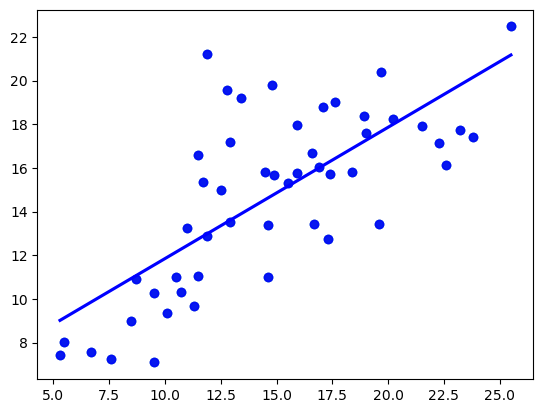

In [36]:
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None, color='blue')
plt.show()